# Least Square Approximations Yield Posteriors

(Significance)

Our justification of MLPs has so far been mostly heuristic.

However, there is a close connection with Bayesian classification.

In particular, the MLP outputs approximate the posterior probability.

Recall that classification with $\arg\max_\omega P(\omega|x)$ is optimal under 0-1 loss.

(Unary Encoding of Classes)

For classification problems, we encode classes using a *unary code*.

That is, if the class is $i$, then the target vector is 

$$z_j = \delta(i,j) = (0, ... , 0, 1, 0, ... , 0)$$


(Criterion Function)

Let $\tilde{z} = g(x;\theta)$ be the predicted value of the MLP (or
classifier in general).

The criterion function that we optimize is ($t$ is the target vector)

$$ e = J(\theta) = \sum (g(x;\theta) - t)^2$$

minimizing this is equivalent to minimizing each term and each output unit.

(One Unit)

Consider output unit $k$; we're minimizing

$$ J_k(\theta) = \sum_x (g_k(x;\theta) - t_k)^2 $$

$$ ~~~~~~~~ = \sum_{x\in\omega_k} (g_k(x;\theta)-1)^2 + \sum_{x\not\in\omega_k} (g(x;w)-0)^2 $$

(Pulling Out Factors)

$$ ~~~~~~~~ = \sum_{x\in\omega_k} (g_k(x;\theta)-1)^2 + \sum_{x\not\in\omega_k} (g(x;w)-0)^2 $$

let's pull out some factors

$$ ~~~~~~~~ = n \left( \frac{n_k}{n}\frac{1}{n_k} \sum_{x\in\omega_k} (g_k(x;\theta)-1)^2 + \frac{n-n_k}{n}\frac{1}{n-n_k} \sum_{x\not\in\omega_k} (g_k(x;\theta) - 0)^2 \right)$$

(Limit)

Let us now consider the limit as $n\rightarrow\infty$; then

$$ \frac{n_k}{n} \rightarrow P(\omega_k) $$

$$ \frac{n-n_k}{n} \rightarrow P(\omega^c_k) $$

(Sums to Integrals)

In the limit, sums over random samples turn into integrals:

$${\frac{1}{N}\sum_{x_i\tilde\; p(x_i)} f(x_i)} \rightarrow {\int f(x) p(x) dx} $$

(Sampled Sums to Integrals)

The remaining sums converge to the corresponding integrals in the following equation:

$$\lim_{n\rightarrow\infty} \frac{1}{n} J_k(\theta) $$
$$ ~~~~~~~~ = P(\omega_k) \int (g_k(x;\theta)-1)^2 p(x|\omega_k) dx + P(\omega_k^c) \int g_k^2(x;\theta) p(x|\omega_k^c) dx$$
...
$$ ~~~~~~~~ = \int g_k^2(x;\theta) p(x) dx - 2 \int g_k(x;\theta) p(x,\omega_k) dx + \int p(x,\omega_k) dx $$
$$ ~~~~~~~~ = \int [ g_k(x;\theta)-P(\omega_k|x) ]^2 p(x) dx + \int P(\omega_k|x) P(\omega_k^c|x) p(x) dx $$

the second term is independent of $\theta$.

(Term-wise minimization)

Therefore, least square minimization minimizes

$$ \int [g_k(x;\theta) - P(\omega_k|x)]^2 p(x) dx $$

This is minimized for each term,
therefore $g_k(x;\theta) \approx P(\omega_k|x)$ asymptotically

(Notes)

- this relationship is true only asymptotically
- the sum of the network outputs is not necessarily $1$
- if the sum of the network outputs differs substantially from $1$, that's an indication that the pattern is outside the domain over which the network predicts probabilities well

An alternative approach is to use *softmax*. In softmax, the output transfer function
is replaced by $e^{By+b}$, and the actual output of the network is computed as the ratio of the output divided by the sum of all the outputs

Simple Demonstration with Gaussians
====================================

In [1]:
from pylab import *
from scipy.stats import norm

Let's consider a very simple, 1D classification problem.
Our class-conditional densities $p(x|c)$ are normally
distributed with means 0 and 1.
We can calculate and plot the exact posterior directly.

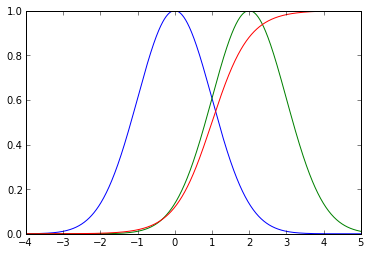

In [2]:
lxs = linspace(-4,5,1000)
ys0 = norm.pdf(lxs); ys0 /= amax(ys0)
plot(lxs,ys0)
ys1 = norm.pdf(lxs,loc=2); ys1 /= amax(ys1)
plot(lxs,ys1)
posterior = ys1/(ys0+ys1)
plot(lxs,ys1/(ys0+ys1))

Now we take 100 samples from each class conditional density.
These are the training samples for our classifier.

In [3]:
samples0 = norm.rvs(size=100)
samples1 = norm.rvs(size=100,loc=2)

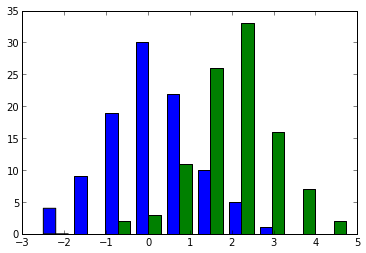

In [4]:
_=hist([samples0,samples1])

Posteriors by Histogramming
----------------------------

We can compute the posteriors by binning and histogramming
(this has nothing to do with the proof above, but it
just is an illustration of the computation of posteriors).
In the 1D case, this actually often works quite well.

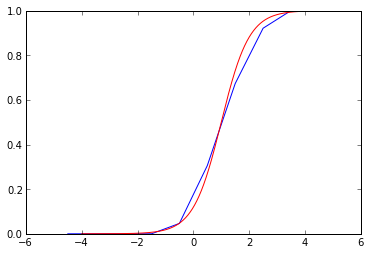

In [5]:
xs = []
ys = []
for x in range(-5,5):
    y0 = sum(floor(samples0)==x)
    y1 = sum(floor(samples1)==x)
    xs.append(x+0.5)
    ys.append(y1*1.0/max(1.0,y0+y1))
plot(xs,ys)
plot(lxs,posterior,color='r')

Least Square Fit with a Polynomial
----------------------------------

Let's try a simple least square fit, with a polynomial.
Before we do that, let's look at the function we're actually
trying to approximate.
From a least square fitting point of view, this function
looks rather odd.

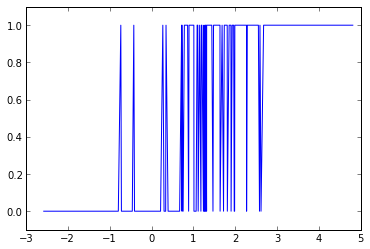

In [9]:
data = c_[r_[samples0,samples1],r_[zeros(len(samples0)),ones(len(samples1))]]
order = argsort(data[:,0])
s = data[order,:]
ylim(-0.1,1.1)
plot(s[:,0],s[:,1])

We can use the function `polyfit` to perform polynomial fitting.

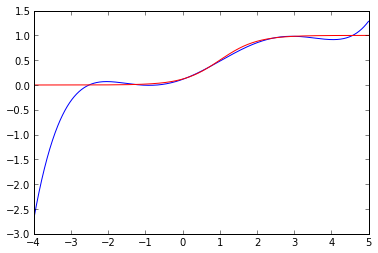

In [10]:
fit = polyfit(data[:,0],data[:,1],5)
plot(lxs,polyval(fit,lxs))
plot(lxs,posterior,color='r')

The fit actually approximates the data fairly well over the range where we have data points.

This looks even better if we clip the output values.

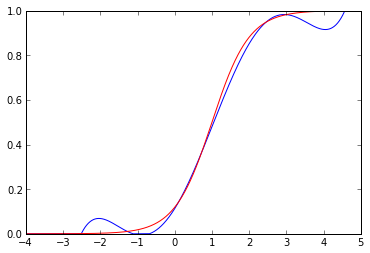

In [11]:
plot(lxs,clip(polyval(fit,lxs),0,1))
plot(lxs,posterior,color='r')

Linear Least Square
-------------------

For comparison, let's also look at a simple linear fit.

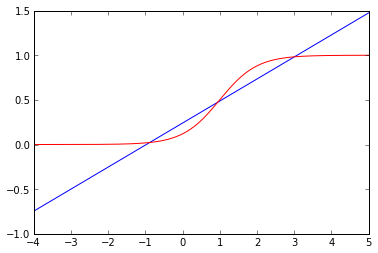

In [12]:
data = r_[c_[samples0,zeros(100)],c_[samples1,ones(100)]]
fit = polyfit(data[:,0],data[:,1],1)
plot(lxs,polyval(fit,lxs))
plot(lxs,posterior,color='r')

Note that these kinds of linear fits are very sensitive
to outliers. 
We add two data points that ought to be really easy
to classify, and they completely change the approximation
to the posterior.

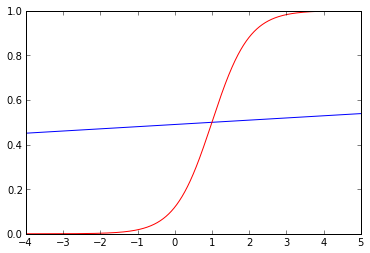

In [13]:
data1 = data.copy()
data1[0,:] = array([-100,0])
data1[-1,:] = array([100,1])
fit = polyfit(data1[:,0],data1[:,1],1)
plot(lxs,polyval(fit,lxs))
plot(lxs,posterior,color='r')

Logistic Regression
--------------------

Logistic regression is a much better fit.

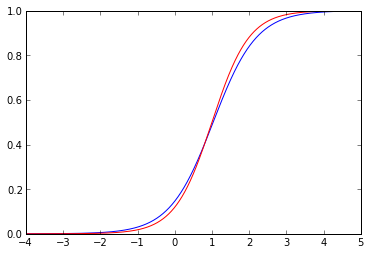

In [14]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(data[:,0].reshape(200,1),data[:,1])
plot(lxs,lr.predict_proba(lxs.reshape(1000,1))[:,1])
plot(lxs,posterior,color='r')

Note that logistic regression is not influenced by outliers
in the same way as linear least squares.
That's because the derivative of the sigmoid is nearly zero
for points that are correctly classified but far from the
decision boundary.

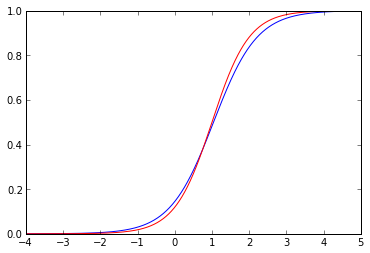

In [15]:
lr = linear_model.LogisticRegression()
lr.fit(data1[:,0].reshape(200,1),data1[:,1])
plot(lxs,lr.predict_proba(lxs.reshape(1000,1))[:,1])
plot(lxs,posterior,color='r')

**Homework** Given class conditional densities $p(x|c)$ for $c\in\\{0,1\\}$
that are normal densities
with means 0 and $\mu$ and
a standard deviation $\sigma=1$, compute the posterior probability
$P(c=1|x)$.

Least Squares with Kernel Functions
-----------------------------------

(Nonlinear Approximations to the Posterior)

We are trying to predict a non-linear function $y = f(x)$.

We have tried different approximations:

- A linear fit: $y = mx+b$
- A polynomial fit: $y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f$
- Logistic regression: $y = \sigma(mx + b)$

(Generalization)

Note that the polynomial fit is really just a multidimensional
linear fit to a bunch of non-linear functions of the input.
We can generalize this approach to a generalized linear fit
(note that we can choose $\phi_r(x) = 1$ to handle the constant term).

$y = w_1 \phi_1(x) + w_2 \phi_2(x) + ... + w_r \phi_r(x)$

A common choice for the $\phi_i$ is the use of a kernel, 
a single non-linear function that is shifted around:

$y = w_1 \phi(x-\mu_1) + ... + w_r \phi(x-\mu_r) $

(Gaussian Kernels)

And a particularly common choice for the $\phi$ is Gaussian functions,
$\phi(x) = e^{-\frac{x^2}{2\sigma^2}}$

This kind of representation forms the basis of *support
vector* machines.  Support vector machines (or kernel machines)
effectively also perform a fit to the data points, just like
least square methods, but using a different loss function (hinge loss).

To perform a least square fit, we first take the original data
$(x_i,y_i)$, transform it by computing the $\phi_r$ functions,
and then performing a linear fit on the outputs.

Let's start by sorting the data by its $x$ coordinate;
that helps with plotting later (it has no influence on the fit).



In [16]:
data = data[argsort(data[:,0]),:]

A Gaussian kernel with a smallish $\sigma$ is given by this function.



In [17]:
def K(x,mu): return exp(-(x-mu)**2/0.2)

Now we define a function that computes all the $\phi_r$ for a given
input $x$.
We can view this as a kind of ``feature extraction'',
a preprocessing of the data that helps with classification.



In [18]:
def Kv(x): return array([K(x,mu) for mu in linspace(-2,3,11)])

To perform the linear fit, we first need to transform all the data points
in the training set.



In [19]:
zs = array([Kv(x) for x in data[:,0]])

To make sure that this worked as expected, let's plot
the output of $\phi_5(x_i)$ against the $x_i$.



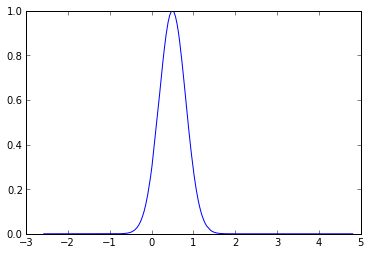

In [20]:
plot(data[:,0],zs[:,5])

We can perform the least square fit with a pseudo-inverse:

$$w = Z^\dagger \cdot y$$

Here, $Z$ is the transformed data matrix,
$y$ is the desired outputs,
and $M^\dagger$ is the pseudo-inverse of the matrix.



In [21]:
w = dot(pinv(zs),data[:,1].reshape(200,1)).ravel()
w

array([ 0.04377891, -0.06688098,  0.08231902,  0.03663106,  0.01220642,
        0.05338284,  0.46667431,  0.34844818,  0.70233284,  0.31302812,
        1.06082602])

We can now compute the prediction of this least square approximation
and compare it with the true posterior.



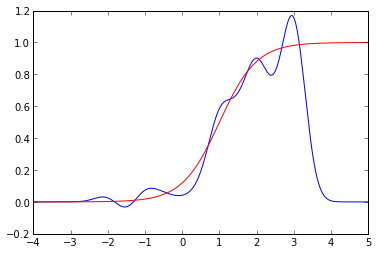

In [22]:
plot(lxs,[dot(w,Kv(x)) for x in lxs])
plot(lxs,posterior,color='r')



As you can see, the fit works OK.  The fact that it is near zero 
again above $x=4$ is just a consequence of the fact that we have no data there.

These kinds of fits can be tricky, though.  For example, if
we add another $\phi_r$ centered in a region where there is no data,
then the weight $w_r$ is adjusted based on the tail of that
Gaussian, leading to an unreasonable posterior.



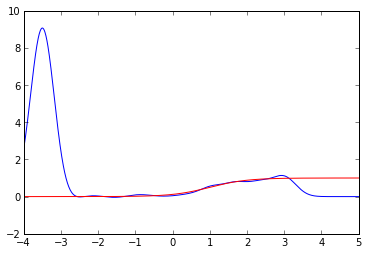

In [25]:
def Kv(x): return array([K(x,mu) for mu in linspace(-3.5,3,11)])
zs = array([Kv(x) for x in data[:,0]])
w = dot(pinv(zs),data[:,1].reshape(200,1)).ravel()
plot(lxs,[dot(w,Kv(x)) for x in lxs])
plot(lxs,posterior,color='r')

This means that it is prudent to pick values for the $\mu_i$ that are close
to the decision boundary, since using $\mu_i$ centered on outliers may give
rise to bad generalization.

This is, in effect, what support vector machines are trying to do (among
other things).